# 3.1.4

##### 디지털 영상 기초: RGB 컬러 영상을 채널별로 구분해 시각화하기


In [1]:
import cv2
import sys


img = cv2.imread("images/soccer.jpg")

if img is None:
    sys.exit("파일을 찾을 수 없습니다.")

cv2.imshow("original_RGB", img)
cv2.imshow("Upper left half", img[0 : img.shape[0] // 2, 0 : img.shape[1] // 2, :])
cv2.imshow(
    "Center half",
    img[
        img.shape[0] // 4 : 3 * img.shape[0] // 4,
        img.shape[1] // 4 : 3 * img.shape[1] // 4,
        :,
    ],
)
cv2.imshow("R channel", img[:, :, 2])
cv2.imshow("G channel", img[:, :, 1])
cv2.imshow("B channel", img[:, :, 0])

cv2.waitKey()
cv2.destroyAllWindows()


# 3.2.4 

##### 모폴로지: 모폴로자 연산 적용하기

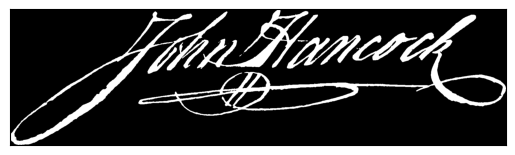

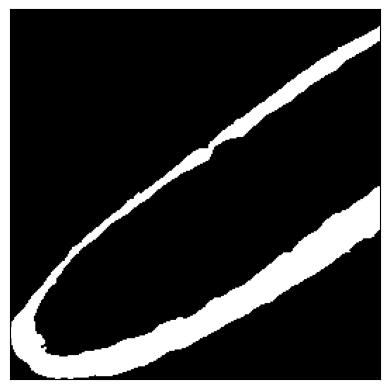

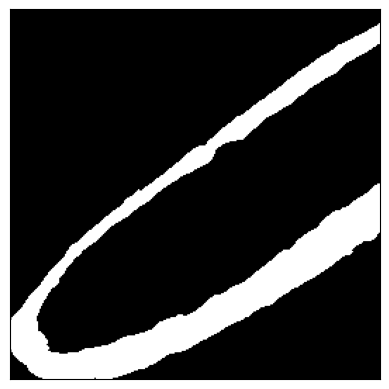

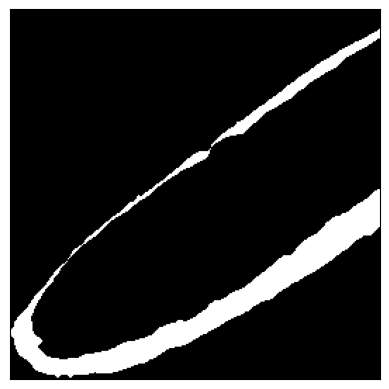

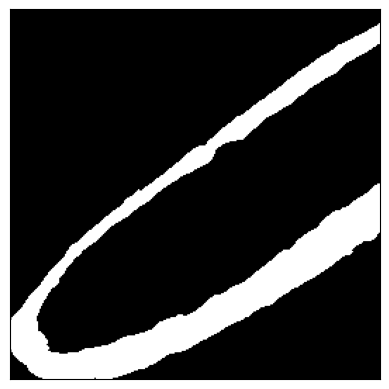

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread("images/JohnHancocksSignature.png", cv2.IMREAD_UNCHANGED)

t, bin_img = cv2.threshold(img[:, :, 3], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(bin_img, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()

b = bin_img[bin_img.shape[0] // 2 : bin_img.shape[0], 0 : bin_img.shape[0] // 2 + 1]
plt.imshow(b, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()

se = np.uint8(
    [
        [0, 0, 1, 0, 0],
        [0, 1, 1, 1, 0],
        [1, 1, 1, 1, 1],
        [0, 1, 1, 1, 0],
        [0, 0, 1, 0, 0],
    ]
)

b_dilation = cv2.dilate(b, se, iterations=1)
plt.imshow(b_dilation, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()

b_erosion = cv2.erode(b, se, iterations=1)
plt.imshow(b_erosion, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()


b_closing = cv2.erode(cv2.dilate(b, se, iterations=1), se, iterations=1)
plt.imshow(b_dilation, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()


# 3.3.2 

##### 히스토그램 평활화: 히스토그램 평활화하기

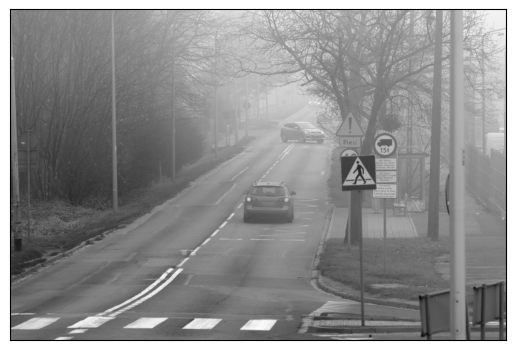

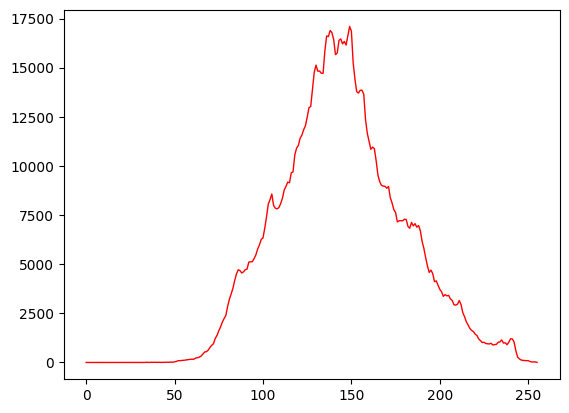

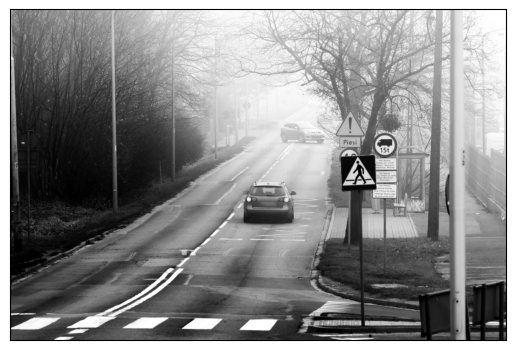

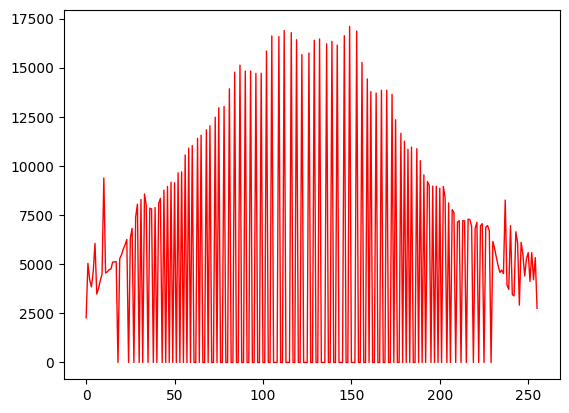

([<matplotlib.lines.Line2D at 0x1905be9e3b0>], None)

In [3]:
import cv2
import matplotlib.pyplot as plt


img = cv2.imread("images/mistyroad.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray"), plt.xticks([]), plt.yticks([]), plt.show()

h = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.plot(h, color="r", linewidth=1), plt.show()

equal = cv2.equalizeHist(gray)
plt.imshow(equal, cmap="gray"), plt.xticks([]), plt.yticks([]), plt.show()

h = cv2.calcHist([equal], [0], None, [256], [0, 256])
plt.plot(h, color="r", linewidth=1), plt.show()


# 4.1.2 

##### 에지 연산자: 소벨 엣지 검출하기


In [4]:
import cv2


img = cv2.imread("images/soccer.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

grad_x = cv2.Sobel(gray, cv2.CV_32F, 1, 0, ksize=3)
grad_y = cv2.Sobel(gray, cv2.CV_32F, 0, 1, ksize=3)

sobel_x = cv2.convertScaleAbs(grad_x)
sobel_y = cv2.convertScaleAbs(grad_y)

edge_strength = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

cv2.imshow("Original", gray)
cv2.imshow("Sobel x", sobel_x)
cv2.imshow("Sobel y", sobel_y)
cv2.imshow("edge strength", edge_strength)

cv2.waitKey()
cv2.destroyAllWindows()


# 4.3.2 
##### 허프 변환: 허프 변환을 이용해 사과 검출하기


In [5]:
import cv2


img = cv2.imread("images/apples.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

apples = cv2.HoughCircles(
    gray, cv2.HOUGH_GRADIENT, 1, 200, param1=150, param2=20, minRadius=50, maxRadius=120
)

for apple in apples[0]:
    cv2.circle(img, (int(apple[0]), int(apple[1])), int(apple[2]), (255, 0, 0), 2)

cv2.imshow("Apple detection", img)

cv2.waitKey()
cv2.destroyAllWindows()


# 4.4.3 
##### 최적화 분할: 정규화 절단 알고리즘으로 영역 분할하기


In [6]:
import time
import skimage
import numpy as np
import cv2


coffee = skimage.data.coffee()

start = time.time()
slic = skimage.segmentation.slic(coffee, compactness=20, n_segments=600, start_label=1)
g = skimage.graph.rag_mean_color(coffee, slic, mode="similarity")
ncut = skimage.graph.cut_normalized(slic, g)
print(coffee.shape, " Coffee 영상을 분할하는데 ", time.time() - start, "초 소요")

marking = skimage.segmentation.mark_boundaries(coffee, ncut)
ncut_coffee = np.uint8(marking * 255.0)

cv2.imshow("Normalized cut", cv2.cvtColor(ncut_coffee, cv2.COLOR_RGB2BGR))

cv2.waitKey()
cv2.destroyAllWindows()


(400, 600, 3)  Coffee 영상을 분할하는데  6.549048185348511 초 소요


# 5.4 
##### SIFT: SIFT 검출

In [7]:
import cv2


img = cv2.imread("images/mot_color70.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
kp, des = sift.detectAndCompute(gray, None)

gray = cv2.drawKeypoints(gray, kp, None, flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
cv2.imshow("sift", gray)

k = cv2.waitKey()
cv2.destroyAllWindows()


### 감사합니다

